In [1]:
import pandas as pd
import numpy as np
import stats
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils import get_occ_dfs, get_hmmconf_df, get_bp_df
import validation
from validation import get_dataset_metrics, extract_filename, plot_bar_chart_comparison, get_statistics, print_stat, print_procentual

from IPython.utils import io

In [2]:
INPUT_DIR = os.path.join('..','output')
PREFIX_ALIGN_DIR = os.path.join(INPUT_DIR, 'prefix-alignment')
PREFIX_W_1_DIR = os.path.join(PREFIX_ALIGN_DIR, 'window-size-1')
PREFIX_W_INF_DIR = os.path.join(PREFIX_ALIGN_DIR, 'window-size-maximum')
HMMCONF_DIR = os.path.join(INPUT_DIR,'hmmconf')
C_3PO_DIR = os.path.join(INPUT_DIR,'C-3PO')
BP_DIR = os.path.join(INPUT_DIR,'bp')

#LOGS = ["BPI_2012","BPI_2017","M1","M2","M4","M8","M9"]
NOT_BP_LOGS = ['M4','M9']
LOGS = ["BPI_2017","BPI_2012","M1","M2","M8"]
LOG_TYPES = ['completenes20', 'completeness50', 'sim']

## Datasets
note: Kristo can share his insights
- completeness logs
- regular logs
- model types

Additional:
1. Summary statistics
    - trace length distribution
    - unique acitivities
2. Behaviour (parallelism, XOR etc)

### Log statistics

## Preprocessing

In [3]:
from IPython.utils import io

occ_output_dirs = [C_3PO_DIR, PREFIX_W_1_DIR, PREFIX_W_INF_DIR, HMMCONF_DIR, BP_DIR]
with io.capture_output() as captured:
    C_3PO_df = get_occ_dfs(occ_output_dirs[0], True)

    pref_w_1_df = get_occ_dfs(occ_output_dirs[1])

    pref_w_inf_df = get_occ_dfs(occ_output_dirs[2])

    hmmconf_df = get_hmmconf_df(occ_output_dirs[3])

    BP_df = get_bp_df(occ_output_dirs[4])

In [4]:
print("3PO")
print("columns: {}".format(C_3PO_df.columns.tolist()))
print("Traces total: {}".format(C_3PO_df.shape[0]))

print(110*'-')

print("W-1")
print("columns: {}".format(pref_w_1_df.columns.tolist()))
print("Traces total: {}".format(pref_w_1_df.shape[0]))

print(110*'-')

print("W-inf")
print("columns: {}".format(pref_w_inf_df.columns.tolist()))
print("Traces total: {}".format(pref_w_inf_df.shape[0]))

print(110*'-')

print("hmmconf")
print("columns: {}".format(hmmconf_df.columns.tolist()))
print("Traces total: {}".format(hmmconf_df.groupby(['model','log_type','TraceId']).agg({'ExecutionTime': np.sum}).shape[0]))

print(110*'-')

print("BP")
print("columns: {}".format(BP_df.columns.tolist()))
print("Traces total: {}".format(BP_df.groupby(['model','log_type','TraceId']).agg({'ExecutionTime': np.sum}).shape[0]))

3PO
columns: ['TraceId', 'total cost', 'Completeness cost', 'Confidence cost', 'Conformance cost', 'ExecutionTime', 'model', 'log_type']
Traces total: 10500
--------------------------------------------------------------------------------------------------------------
W-1
columns: ['TraceId', 'Conformance cost', 'ExecutionTime', 'model', 'log_type']
Traces total: 10500
--------------------------------------------------------------------------------------------------------------
W-inf
columns: ['TraceId', 'Conformance cost', 'ExecutionTime', 'model', 'log_type']
Traces total: 10500
--------------------------------------------------------------------------------------------------------------
hmmconf
columns: ['TraceId', 'ExecutionTime', 'emitconf', 'stateconf', 'finalconf', 'injected_distance', 'completeness', 'model', 'log_type']
Traces total: 2010
--------------------------------------------------------------------------------------------------------------
BP
columns: ['TraceId', 'activ

In [5]:
print("C_3PO_df")
C_3PO_df[['Completeness cost', 'Conformance cost', 'Confidence cost', 'ExecutionTime']].describe()

C_3PO_df


,Completeness cost,Conformance cost,Confidence cost,ExecutionTime
count,10500.000000,10500.000000,10500.000000,10500.000000
mean,1.029524,15.474317,3.360159,1.506781
std,1.781944,11.824670,5.460127,1.580683
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,0.400000
50%,0.000000,14.000000,0.000000,1.200000
75%,2.000000,22.000000,6.666667,2.200000
max,20.000000,136.000000,22.000000,32.466667


In [6]:
print("pref_w_1_df")
pref_w_1_df[['Conformance cost', 'ExecutionTime']].describe()

pref_w_1_df


,Conformance cost,ExecutionTime
count,10500.000000,10500.000000
mean,17.537048,20.518133
std,12.339433,52.157159
min,0.000000,0.000000
25%,8.000000,1.000000
50%,15.000000,8.200000
75%,24.000000,21.850000
max,167.000000,1833.200000


In [7]:
print("pref_w_inf_df")
pref_w_inf_df[['Conformance cost', 'ExecutionTime']].describe()

pref_w_inf_df


,Conformance cost,ExecutionTime
count,10500.000000,10500.000000
mean,15.201714,38.727562
std,11.512152,104.886534
min,0.000000,0.000000
25%,7.000000,3.400000
50%,12.000000,14.000000
75%,21.000000,40.200000
max,162.000000,4249.000000


In [8]:
print("hmmconf")
hmmconf_df[['ExecutionTime', 'finalconf', 'injected_distance', 'completeness']].describe()

hmmconf


,ExecutionTime,finalconf,injected_distance,completeness
count,41368.000000,41368.000000,41368.000000,41368.000000
mean,0.198358,0.443630,7.141269,0.699586
std,0.777391,0.417259,7.716626,0.227686
min,0.000000,0.000000,0.000000,0.125000
25%,0.000000,0.081997,2.000000,0.545455
50%,0.000000,0.183405,5.000000,0.750000
75%,0.000000,0.984876,9.600000,0.876774
max,42.486520,1.000000,81.000000,1.000000


In [9]:
print("BP_df")
BP_df[['ExecutionTime', 'conformance', 'completeness', 'confidence']].describe()

BP_df


,ExecutionTime,conformance,completeness,confidence
count,206418.000000,206418.000000,206418.000000,206418.000000
mean,0.001917,0.374243,0.693455,0.657628
std,0.034577,0.178135,0.287139,0.235074
min,0.000220,0.000000,0.000000,0.000000
25%,0.000900,0.250000,0.476190,0.520000
50%,0.001140,0.361667,0.771429,0.680000
75%,0.001480,0.487968,1.000000,0.840000
max,6.432220,1.000000,1.000000,1.000000


## Validation

In [10]:
dims_14 = {'conf': 1, 'time': 2}
avg_costs_14 = {'conf': [], 'time': []}

dims_25 = {'conf': 1, 'compl': 2, 'confi': 3, 'total': 4, 'time': 5}
avg_costs_25 = {'conf': [], 'compl': [], 'confi': [], 'total': [], 'time': []}

no_compl_no_conf_dict, _ = get_dataset_metrics(
    INPUT_DIR+"/tripleocc_runs/no_compl_no_conf", dims=dims_25, avg_costs=avg_costs_25, regex_f=extract_filename)
no_compl_avg_dict, _ = get_dataset_metrics(
    INPUT_DIR+"/tripleocc_runs/no_compl_avg", dims=dims_25, avg_costs=avg_costs_25, regex_f=extract_filename)
no_compl_min_dict, _ = get_dataset_metrics(
    INPUT_DIR+"/tripleocc_runs/no_compl_min", dims=dims_25, avg_costs=avg_costs_25, regex_f=extract_filename)
no_conf_ws_all_states_dict, _ = get_dataset_metrics(
    INPUT_DIR+"/tripleocc_runs/no_conf_ws_all_states", dims=dims_25, avg_costs=avg_costs_25, regex_f=extract_filename)
no_conf_ws_root_dict, dataset_keys = get_dataset_metrics(
    INPUT_DIR+"/tripleocc_runs/no_conf_ws_root", dims=dims_25, avg_costs=avg_costs_25, regex_f=extract_filename)

### Completeness

In [11]:
no_compl_no_conf_compl_stats=get_statistics(no_compl_no_conf_dict, validation.completeness_output)
no_conf_ws_root_stats=get_statistics(no_conf_ws_root_dict, validation.completeness_output)
no_conf_ws_all_stats=get_statistics(no_conf_ws_all_states_dict, validation.completeness_output)

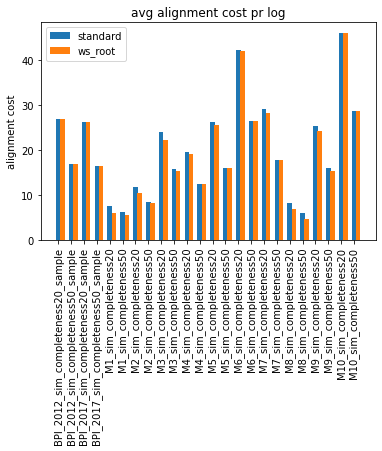

ws root stats:
ws root: mean mean all logs 19.437 - IWS: mean mean all logs 19.96
ws root: mean std all logs 9.896 - IWS: mean std all logs 9.679
Decrease % in conformance: -2.62


In [12]:
"""Grouped bar chart - ws root"""

plot_bar_chart_comparison(validation.completeness_output, no_compl_no_conf_compl_stats,
                            no_conf_ws_root_stats, 'mean', ['standard', 'ws_root'], "alignment cost", "avg alignment cost pr log")

print("ws root stats:")
print_stat('mean', no_conf_ws_root_stats, no_compl_no_conf_compl_stats, "ws root", "IWS")
print_stat('std', no_conf_ws_root_stats, no_compl_no_conf_compl_stats,  "ws root", "IWS")
print_procentual('mean','conformance',no_conf_ws_root_stats, no_compl_no_conf_compl_stats)

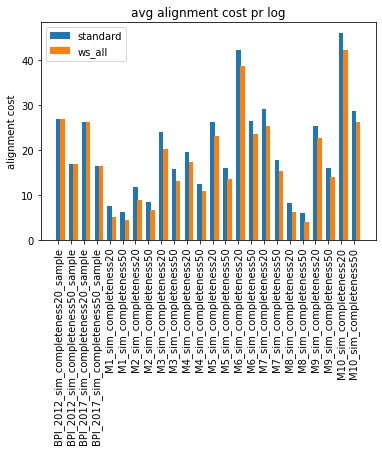

ws all stats:
ws all: mean mean all logs 17.804 - IWS: mean mean all logs 19.96
ws all: mean std all logs 9.402 - IWS: mean std all logs 9.679
Decrease % in conformance: -10.802


In [13]:
"""Grouped bar chart - ws all"""

plot_bar_chart_comparison(validation.completeness_output, no_compl_no_conf_compl_stats,
                            no_conf_ws_all_stats, 'mean', ['standard', 'ws_all'], "alignment cost", "avg alignment cost pr log")

print("ws all stats:")
print_stat('mean', no_conf_ws_all_stats, no_compl_no_conf_compl_stats, "ws all", "IWS")
print_stat('std', no_conf_ws_all_stats, no_compl_no_conf_compl_stats,  "ws all", "IWS")
print_procentual('mean','conformance',no_conf_ws_all_stats, no_compl_no_conf_compl_stats)

#### Completeness all logs

In [14]:
no_compl_no_conf_compl_stats = get_statistics(no_compl_no_conf_dict, validation.normal_output)
no_conf_ws_root_stats = get_statistics(no_conf_ws_root_dict, validation.normal_output)
no_conf_ws_all_stats = get_statistics(no_conf_ws_all_states_dict, validation.normal_output)

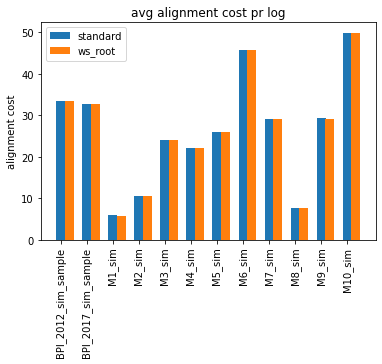

ws root stats:
avg conf: mean mean all logs 26.347 - IWS: mean mean all logs 26.379
avg conf: mean std all logs 15.344 - IWS: mean std all logs 15.344
Decrease % in conformance: -0.121


In [15]:
""" grouped bar chart ws root """

plot_bar_chart_comparison(validation.normal_output, no_compl_no_conf_compl_stats,
                          no_conf_ws_root_stats, 'mean', ['standard', 'ws_root'], "alignment cost", "avg alignment cost pr log")

print("ws root stats:")
print_stat('mean', no_conf_ws_root_stats, no_compl_no_conf_compl_stats, "avg conf", "IWS")
print_stat('std', no_conf_ws_root_stats, no_compl_no_conf_compl_stats,  "avg conf", "IWS")
print_procentual('mean','conformance',no_conf_ws_root_stats, no_compl_no_conf_compl_stats)

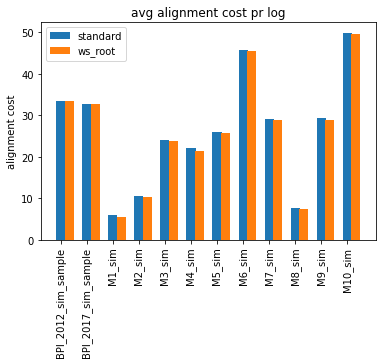

ws all stats:
avg conf: mean mean all logs 26.116 - IWS: mean mean all logs 26.379
avg conf: mean std all logs 15.297 - IWS: mean std all logs 15.344
Decrease % in conformance: -0.997


In [16]:
""" grouped bar chart ws all """

plot_bar_chart_comparison(validation.normal_output, no_compl_no_conf_compl_stats,
                          no_conf_ws_all_stats, 'mean', ['standard', 'ws_root'], "alignment cost", "avg alignment cost pr log")

print("ws all stats:")
print_stat('mean', no_conf_ws_all_stats, no_compl_no_conf_compl_stats, "avg conf", "IWS")
print_stat('std', no_conf_ws_all_stats, no_compl_no_conf_compl_stats,  "avg conf", "IWS")
print_procentual('mean','conformance',no_conf_ws_all_stats, no_compl_no_conf_compl_stats)

##### Mean execution time comparison

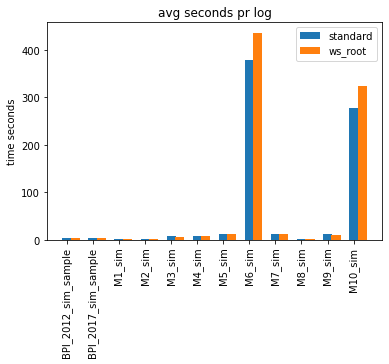

Increase % in time: 14.369


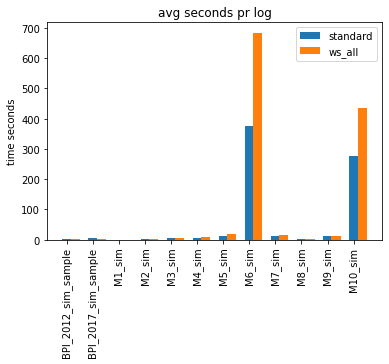

Increase % in time: 66.918


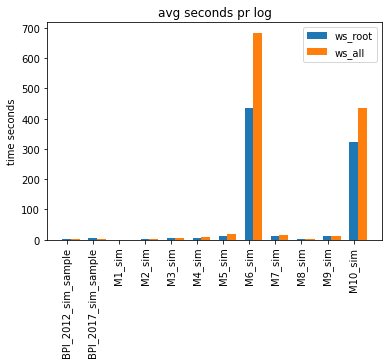

Increase % in time: 45.947


In [17]:
plot_bar_chart_comparison(validation.normal_output, no_compl_no_conf_compl_stats,
                          no_conf_ws_root_stats, 'time', ['standard', 'ws_root'], "time seconds", "avg seconds pr log")

print_procentual('time','time',no_conf_ws_root_stats, no_compl_no_conf_compl_stats)

plot_bar_chart_comparison(validation.normal_output, no_compl_no_conf_compl_stats,
                          no_conf_ws_all_stats, 'time', ['standard', 'ws_all'], "time seconds", "avg seconds pr log")

print_procentual('time','time',no_conf_ws_all_stats, no_compl_no_conf_compl_stats)

plot_bar_chart_comparison(validation.normal_output, no_conf_ws_root_stats,
                          no_conf_ws_all_stats, 'time', ['ws_root', 'ws_all'], "time seconds", "avg seconds pr log")

print_procentual('time','time',no_conf_ws_all_stats, no_conf_ws_root_stats)

### Confidence

In [18]:
no_compl_no_conf_conf_stats = get_statistics(no_compl_no_conf_dict, validation.confidence_output)
no_compl_avg_conf_stats = get_statistics(no_compl_avg_dict, validation.confidence_output)
no_compl_min_conf_stats = get_statistics(no_compl_min_dict, validation.confidence_output)

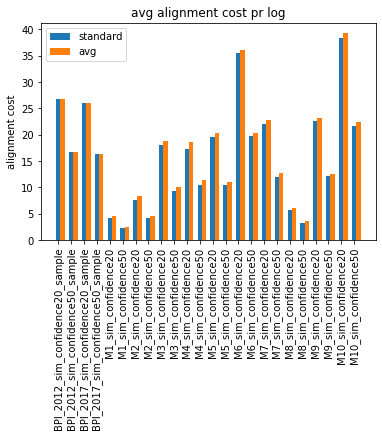

no completeness avg conf stats:
avg conf: mean mean all logs 16.476 - IWS: mean mean all logs 15.95
avg conf: mean std all logs 9.995 - IWS: mean std all logs 9.788
Increase % in conformance: 3.298


In [19]:
"""Grouped bar chart - confidence average"""

plot_bar_chart_comparison(validation.confidence_output, no_compl_no_conf_conf_stats,
                          no_compl_avg_conf_stats, 'mean', ['standard', 'avg'], "alignment cost", "avg alignment cost pr log")

print("no completeness avg conf stats:")
print_stat('mean', no_compl_avg_conf_stats, no_compl_no_conf_conf_stats, "avg conf", "IWS")
print_stat('std', no_compl_avg_conf_stats, no_compl_no_conf_conf_stats,  "avg conf", "IWS")
print_procentual('mean','conformance',no_compl_avg_conf_stats, no_compl_no_conf_conf_stats)


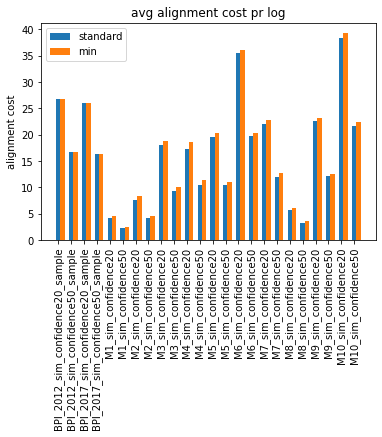

no completeness min conf stats:
min conf: mean mean all logs 16.475 - IWS: mean mean all logs 15.95
min conf: mean std all logs 9.995 - IWS: mean std all logs 9.788
Increase % in conformance: 3.292


In [20]:
plot_bar_chart_comparison(validation.confidence_output, no_compl_no_conf_conf_stats,
                          no_compl_min_conf_stats, 'mean', ['standard', 'min'], "alignment cost", "avg alignment cost pr log")

print("no completeness min conf stats:")
print_stat('mean', no_compl_min_conf_stats, no_compl_no_conf_conf_stats, "min conf", "IWS")
print_stat('std', no_compl_min_conf_stats, no_compl_no_conf_conf_stats,  "min conf", "IWS")
print_procentual('mean','conformance',no_compl_min_conf_stats, no_compl_no_conf_conf_stats)

## Stress test

- Operating system: Windows 11 Home 64-bit
- Processor: AMD Ryzen 7 5800 8-Core Processor (16 CPUs) ~3.4 GHz
- Memory: 16384MB RAM

Stress test was carried out by running each algorithm on the datasets 5 times and averaging the execution times to level out system resource interference while running the experiments.


### Average computation time per trace

In [21]:
C_3PO_test = C_3PO_df.copy()
pref_w_1_test = pref_w_1_df.copy()
pref_w_inf_test = pref_w_inf_df.copy()
BP_test = BP_df.copy()

to_use = [C_3PO_test, pref_w_1_test, pref_w_inf_test, BP_test]
names_ = ['C_3PO_test', 'pref_w_1_test', 'pref_w_inf_test', 'BP_test']

t_ = dict()
for n_, df_ in list(zip(names_, to_use)):
    t_[n_] = list()
    for log_n in LOGS:
        to_keep = hmmconf_df[hmmconf_df.model == log_n].TraceId.unique()
        df__ = df_[df_['model'] == log_n]
        df__ = df__[df__.TraceId.isin(to_keep)]
        t_[n_].append(df__)

C_3PO_test = pd.concat(t_['C_3PO_test'], ignore_index=True)
pref_w_1_test = pd.concat(t_['pref_w_1_test'], ignore_index=True)
pref_w_inf_test = pd.concat(t_['pref_w_inf_test'], ignore_index=True)
BP_test = pd.concat(t_['BP_test'], ignore_index=True)

In [22]:
print("Validating preprocessing after filtering out traces not in hmmconf")
print("hmmconf: {}".format(hmmconf_df.groupby(['model','log_type','TraceId']).agg({'ExecutionTime': np.sum}).shape[0]))
print("BP_test: {}".format(BP_test.groupby(['model','log_type','TraceId']).agg({'ExecutionTime': np.sum}).shape[0]))
print("C-3PO_test: {}".format(C_3PO_test.shape[0]))
print("W-1: {}".format(pref_w_1_test.shape[0]))
print("W-inf: {}".format(pref_w_inf_test.shape[0]))

Validating preprocessing after filtering out traces not in hmmconf
hmmconf: 2010
BP_test: 2010
C-3PO_test: 2010
W-1: 2010
W-inf: 2010


In [23]:
log_names = [list(zip(3*[log_n], LOG_TYPES)) for log_n in LOGS]
indexes = [l_n+'_'+l_t for l in log_names for (l_n, l_t) in l]
columns = ['C-3PO', 'W-1', 'W-inf', 'HMMCONF', 'BP']

hmmconf_mean_exe = hmmconf_df.groupby(['model','log_type','TraceId']).agg({'ExecutionTime': np.sum}).groupby(['model','log_type']).agg({'ExecutionTime': np.mean}).reset_index()
BP_mean_exe = BP_test.groupby(['model','log_type','TraceId']).agg({'ExecutionTime': np.sum}).groupby(['model','log_type']).agg({'ExecutionTime': np.mean}).reset_index()
C_3PO_mean_exe = C_3PO_test.groupby(['model','log_type']).agg({'ExecutionTime': np.mean}).reset_index()
pref_w_inf_mean_exe = pref_w_inf_test.groupby(['model','log_type']).agg({'ExecutionTime': np.mean}).reset_index()
pref_w_1_mean_exe = pref_w_1_test.groupby(['model','log_type']).agg({'ExecutionTime': np.mean}).reset_index()

data = np.asarray([C_3PO_mean_exe['ExecutionTime'].values, pref_w_1_mean_exe['ExecutionTime'].values, pref_w_inf_mean_exe['ExecutionTime'].values, hmmconf_mean_exe['ExecutionTime'].values, BP_mean_exe['ExecutionTime'].values])

results = pd.DataFrame(index=indexes, data=data.T, columns=columns)

def highlight_min(s):
    is_max = s == s.min()
    return ['color: green' if cell else '' for cell in is_max]

def highlight_2ndmin(s):
    is_max = s == s.nsmallest(2).iloc[-1]
    return ['color: yellow' if cell else '' for cell in is_max]

def highlight_3rdmin(s):
    is_max = s == s.nsmallest(3).iloc[-1]
    return ['color: red' if cell else '' for cell in is_max]


msg = "green = minimum trace execution time in row \n\
yellow = 2nd smallest execution time in row \n\
red = 3rd smallest execution time in row"

print(msg)

results.style.apply(highlight_min, axis=1).apply(highlight_2ndmin, axis=1).apply(highlight_3rdmin, axis=1)

green = minimum trace execution time in row 
yellow = 2nd smallest execution time in row 
red = 3rd smallest execution time in row


,C-3PO,W-1,W-inf,HMMCONF,BP
BPI_2017_completenes20,2.416129,29.922581,61.424731,2.082543,0.056666
BPI_2017_completeness50,1.416129,9.267742,17.510753,1.353417,0.023702
BPI_2017_sim,2.370251,53.833333,102.845161,2.938818,0.050682
BPI_2012_completenes20,3.092473,28.679570,62.380645,2.469355,0.039050
BPI_2012_completeness50,1.974194,8.927957,16.811828,1.791023,0.037632
BPI_2012_sim,2.903226,49.049462,99.727957,3.020398,0.040614
M1_completenes20,0.452525,7.234343,11.040404,5.285702,0.190279
M1_completeness50,0.195960,2.929293,3.250505,3.002359,0.025632
M1_sim,0.345455,10.705051,17.870707,5.354034,0.033672
M2_completenes20,1.045714,23.935238,39.154286,13.272802,0.038397


### Average computation time per event

is missing

### Memory usage

is missing

## Correlation test

### Spearman correlation with non-conforming results



#### HMMCONF

In [32]:
hmmconf_mean_conf_compl = hmmconf_df.groupby(['model','log_type','TraceId']).agg({'finalconf': np.mean, 'completeness': np.mean, 'injected_distance': np.mean}).reset_index()

merged_df = pd.merge(hmmconf_mean_conf_compl, C_3PO_test, on=['model','log_type','TraceId'])

pred1 = merged_df['Conformance cost'] > 0
pred2 = merged_df['finalconf'] > 0

filtered_df = merged_df.loc[pred1 & pred2, :]

rho_conf_mean_finalconf = stats.spearmanr(filtered_df['Conformance cost'], filtered_df['finalconf'])
rho_conf_compl = stats.spearmanr(filtered_df['Conformance cost'], filtered_df['injected_distance'])
rho_compl_injected_distance = stats.spearmanr(filtered_df['Completeness cost'], filtered_df['injected_distance'])
rho_completeness = stats.spearmanr(filtered_df['Completeness cost'], filtered_df['completeness'])

print(
    'Conformance cost - mean final conformance: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf_mean_finalconf[0], rho_conf_mean_finalconf[1]),
    '\nConformance cost - injected distance: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf_compl[0], rho_conf_compl[1]), 
    '\nCompleteness - injected distance: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_compl_injected_distance[0], rho_compl_injected_distance[1]),
    '\nCompleteness: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_completeness[0], rho_completeness[1])
)

Conformance cost - mean final conformance: spearman rho: -0.379, p-value: 0.0000000000 
Conformance cost - injected distance: spearman rho: -0.175, p-value: 0.0000000000 
Completeness - injected distance: spearman rho: 0.491, p-value: 0.0000000000 
Completeness: spearman rho: -0.668, p-value: 0.0000000000


#### W-2

In [33]:
c_3po_ = C_3PO_df.copy()[['TraceId', 'total cost', 'Completeness cost', 'Conformance cost', 'Confidence cost', 'model', 'log_type']]
pref_w_1_ = pref_w_1_df.copy()

c_3po_ = c_3po_.rename(columns={'Conformance cost':'C_3PO_conf'})
pref_w_1_ = pref_w_1_.rename(columns={'Conformance cost':'pref_w_1_conf'})

merged_df = pd.merge(c_3po_, pref_w_1_, on=['model','log_type','TraceId'])

pred1 = merged_df['C_3PO_conf'] > 0
pred2 = merged_df['pref_w_1_conf'] > 0

filtered_df = merged_df.loc[pred1 & pred2, :]

rho_conf = stats.spearmanr(filtered_df['C_3PO_conf'], filtered_df['pref_w_1_conf'])
rho_conf_compl = stats.spearmanr(filtered_df['Completeness cost'],filtered_df['pref_w_1_conf'])

print(
    'Conformance cost: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf[0], rho_conf[1]),
    '\nCompleteness cost - conformance cost: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf_compl[0], rho_conf_compl[1]), 
)

Conformance cost: spearman rho: 0.967, p-value: 0.0000000000 
Completeness cost - conformance cost: spearman rho: -0.479, p-value: 0.0000000000


#### W-inf

In [34]:
pref_w_inf_ = pref_w_inf_df.copy()
pref_w_inf_ = pref_w_inf_.rename(columns={'Conformance cost':'pref_w_inf_conf'})

merged_df = pd.merge(c_3po_, pref_w_inf_, on=['model','log_type','TraceId'])

pred1 = merged_df['C_3PO_conf'] > 0
pred2 = merged_df['pref_w_inf_conf'] > 0

filtered_df = merged_df.loc[pred1 & pred2, :]

rho_conf = stats.spearmanr(filtered_df['C_3PO_conf'], filtered_df['pref_w_inf_conf'])
rho_conf_compl = stats.spearmanr(filtered_df['Completeness cost'],filtered_df['pref_w_inf_conf'])

print(
    'Conformance cost: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf[0], rho_conf[1]),
    '\nCompleteness cost - conformance cost: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf_compl[0], rho_conf_compl[1]), 
)

Conformance cost: spearman rho: 0.981, p-value: 0.0000000000 
Completeness cost - conformance cost: spearman rho: -0.524, p-value: 0.0000000000


#### BP

In [35]:
c_3po_.head()

,TraceId,total cost,Completeness cost,C_3PO_conf,Confidence cost,model,log_type
0,0,32.0,0.0,32.0,0.0,BPI_2017,completeness20
1,1,17.0,0.0,17.0,0.0,BPI_2017,completeness20
2,2,22.0,0.0,22.0,0.0,BPI_2017,completeness20
3,3,26.0,0.0,26.0,0.0,BPI_2017,completeness20
4,4,27.0,0.0,27.0,0.0,BPI_2017,completeness20


In [45]:
BP_mean = BP_df.groupby(['model','log_type','TraceId']).agg({'conformance': np.mean, 'completeness': np.mean, 'confidence': np.mean}).reset_index()

merged_df = pd.merge(c_3po_, BP_mean, on=['model','log_type','TraceId'])

pred1 = merged_df['C_3PO_conf'] > 0
pred2 = merged_df['conformance'] > 0

filtered_df = merged_df.loc[pred1 & pred2, :]

rho_conformance = stats.spearmanr(filtered_df['C_3PO_conf'], filtered_df['conformance'])
rho_conformance_completeness = stats.spearmanr(filtered_df['C_3PO_conf'], filtered_df['completeness'])
rho_confidence = stats.spearmanr(filtered_df['Confidence cost'], filtered_df['confidence'])
rho_completeness = stats.spearmanr(filtered_df['Completeness cost'], filtered_df['completeness'])

print(
    'Conformance cost - mean conformance: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conformance[0], rho_conformance[1]),
    '\nConformance cost - completeness: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conformance_completeness[0], rho_conformance_completeness[1]), 
    '\nConfidence: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_confidence[0], rho_confidence[1]),
    '\nCompleteness: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_completeness[0], rho_completeness[1])
)

Conformance cost - mean conformance: spearman rho: -0.567, p-value: 0.0000000000 
Conformance cost - completeness: spearman rho: 0.388, p-value: 0.0000000000 
Confidence: spearman rho: -0.504, p-value: 0.0000000000 
Completeness: spearman rho: -0.342, p-value: 0.0000000000


### Spearman correlation with all results

#### HMMCONF

In [39]:
merged_df = pd.merge(hmmconf_mean_conf_compl, C_3PO_test, on=['model','log_type','TraceId'])

rho_conf_mean_finalconf = stats.spearmanr(merged_df['Conformance cost'], merged_df['finalconf'])
rho_conf_compl = stats.spearmanr(merged_df['Conformance cost'], merged_df['injected_distance'])
rho_compl_injected_distance = stats.spearmanr(merged_df['Completeness cost'], merged_df['injected_distance'])
rho_completeness = stats.spearmanr(merged_df['Completeness cost'], merged_df['completeness'])

print(
    'Conformance cost - mean final conformance: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf_mean_finalconf[0], rho_conf_mean_finalconf[1]),
    '\nConformance cost - injected distance: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf_compl[0], rho_conf_compl[1]), 
    '\nCompleteness - injected distance: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_compl_injected_distance[0], rho_compl_injected_distance[1]),
    '\nCompleteness: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_completeness[0], rho_completeness[1])
)

Conformance cost - mean final conformance: spearman rho: -0.414, p-value: 0.0000000000 
Conformance cost - injected distance: spearman rho: -0.124, p-value: 0.0000000254 
Completeness - injected distance: spearman rho: 0.462, p-value: 0.0000000000 
Completeness: spearman rho: -0.670, p-value: 0.0000000000


#### W-2

In [40]:
merged_df = pd.merge(c_3po_, pref_w_1_, on=['model','log_type','TraceId'])

rho_conf = stats.spearmanr(merged_df['C_3PO_conf'], merged_df['pref_w_1_conf'])
rho_conf_compl = stats.spearmanr(merged_df['Completeness cost'],merged_df['pref_w_1_conf'])

print(
    'Conformance cost: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf[0], rho_conf[1]),
    '\nCompleteness cost - conformance cost: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf_compl[0], rho_conf_compl[1]), 
)

Conformance cost: spearman rho: 0.968, p-value: 0.0000000000 
Completeness cost - conformance cost: spearman rho: -0.478, p-value: 0.0000000000


#### W-inf

In [41]:
merged_df = pd.merge(c_3po_, pref_w_inf_, on=['model','log_type','TraceId'])

rho_conf = stats.spearmanr(merged_df['C_3PO_conf'], merged_df['pref_w_inf_conf'])
rho_conf_compl = stats.spearmanr(merged_df['Completeness cost'],merged_df['pref_w_inf_conf'])

print(
    'Conformance cost: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf[0], rho_conf[1]),
    '\nCompleteness cost - conformance cost: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conf_compl[0], rho_conf_compl[1]), 
)

Conformance cost: spearman rho: 0.982, p-value: 0.0000000000 
Completeness cost - conformance cost: spearman rho: -0.522, p-value: 0.0000000000


#### BP

In [44]:
merged_df = pd.merge(c_3po_, BP_mean, on=['model','log_type','TraceId'])

rho_conformance = stats.spearmanr(merged_df['C_3PO_conf'], merged_df['conformance'])
rho_conformance_completeness = stats.spearmanr(merged_df['C_3PO_conf'], merged_df['completeness'])
rho_confidence = stats.spearmanr(merged_df['Confidence cost'], merged_df['confidence'])
rho_completeness = stats.spearmanr(merged_df['Completeness cost'], merged_df['completeness'])

print(
    'Conformance cost - mean conformance: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conformance[0], rho_conformance[1]),
    '\nConformance cost - completeness: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_conformance_completeness[0], rho_conformance_completeness[1]), 
    '\nConfidence: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_confidence[0], rho_confidence[1]),
    '\nCompleteness: spearman rho: {:.3f}, p-value: {:.10f}'.format(rho_completeness[0], rho_completeness[1])
)

Conformance cost - mean conformance: spearman rho: -0.575, p-value: 0.0000000000 
Conformance cost - completeness: spearman rho: 0.389, p-value: 0.0000000000 
Confidence: spearman rho: -0.488, p-value: 0.0000000000 
Completeness: spearman rho: -0.357, p-value: 0.0000000000


## Cumulitative plots

### W-2

In [ ]:
pref_w_1_df['occ'] = len(pref_w_1_df) * ['W-inf']
C_3PO_df['occ'] = len(C_3PO_df) * ['C-3PO']

cumu_df = pd.concat([pref_w_1_df, C_3PO_df])

sns.histplot(x='Conformance cost', data=cumu_df, hue='occ', bins=len(cumu_df), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False);
plt.title("Cumulative distribution function");

#### Intrepretation

- lines are not crossing at ~0.5 which means the median of the two distributions is not the same.
- the probability density of W-1 is higher over all possible values of cost which means it generally calculates a prefixalingment cost higher than C-3PO.

### W-inf

In [ ]:
pref_w_inf_df['occ'] = len(pref_w_inf_df) * ['W-inf']

cumu_df = pd.concat([pref_w_inf_df, C_3PO_df])

sns.histplot(x='Conformance cost', data=cumu_df, hue='occ', bins=len(cumu_df), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False);
plt.title("Cumulative distribution function");

#### Intrepretation

- lines are close at crossing at ~0.5 which means the median of the two distributions is close to the same.
- both lines follow almost identical curve.

In [ ]:
# Example:

# < H > is missing as a model move in the OCC

# size = 8 \
# Trace: {C,E,G,D,B,F,A,H}

# (>>,A):1.0  \
# (C,C):0.0 \
# (E,E):0.0 \
# (G,G):0.0 \
# (>>,H):1.0                  <--- \
# (>>,F):1.0 \
# (D,D):0.0 \
# (B,B):0.0 \
# (F,>>):1.0 \
# (A,>>):1.0 \
# (H,>>):1.0

# Total cost = 6
 
# [logMove:>>, modelMove:A, cost:1] \
# [logMove:C, modelMove:C, cost:0] \
# [logMove:E, modelMove:E, cost:0] \
# [logMove:G, modelMove:G, cost:0] \
# [logMove:D, modelMove:>>, cost:1] \
# [logMove:B, modelMove:>>, cost:1] \
# [logMove:F, modelMove:>>, cost:1] \
# [logMove:A, modelMove:>>, cost:1] \
# [logMove:H, modelMove:H, cost:0]

# Total cost:5

## Real life data set evaluation

missing